In [1]:
import pandas as pd
import numpy as np
import dataanalysis as da
import dataviz as dv
import matplotlib.pyplot as plt

def plot_sen(df, piezo, db_slope, pltstep = 12, figsize = (6.4, 3.6), dpi = 500):
    fig, ax = plt.subplots(figsize = figsize, dpi = dpi)
    ax.plot(df[piezo].dropna())
    ax.plot(df[piezo].dropna().index, db_slope.loc[piezo, 'intercept'] + db_slope.loc[piezo, 'slope'] * np.array([i for i in range(len(df[piezo].dropna().index))]), 'r-')
    ax.set_xticks(np.arange(0, len(df[piezo].dropna()), pltstep), labels = [df[piezo].dropna().index[i] for i in np.arange(0, len(df[piezo].dropna()), pltstep)])
    ax.set_title(piezo)
    plt.setp(ax.get_xticklabels(), rotation = 30, ha = "right", rotation_mode = "anchor")

In [12]:
head = pd.read_csv('data/PTUA2022/head_IT03GWBISSAPTA.csv', index_col = 'DATA')
meta = pd.read_csv('data/PTUA2022/metadata_piezometri_ISS.csv')
db_slope = pd.read_csv("data/results/analysis_ts/res_sslope.csv", index_col=0)

In [7]:
# %% Select solid time series, remove outliers and fill missing values

cn = da.CheckNA(head)
filtered, removed = cn.filter_col(20, True)
co = da.CheckOutliers(filtered, False)
head_clean = co.remove(skip = ['PO0120750R2020'])
head_fill = head_clean.interpolate('linear', limit = 14)

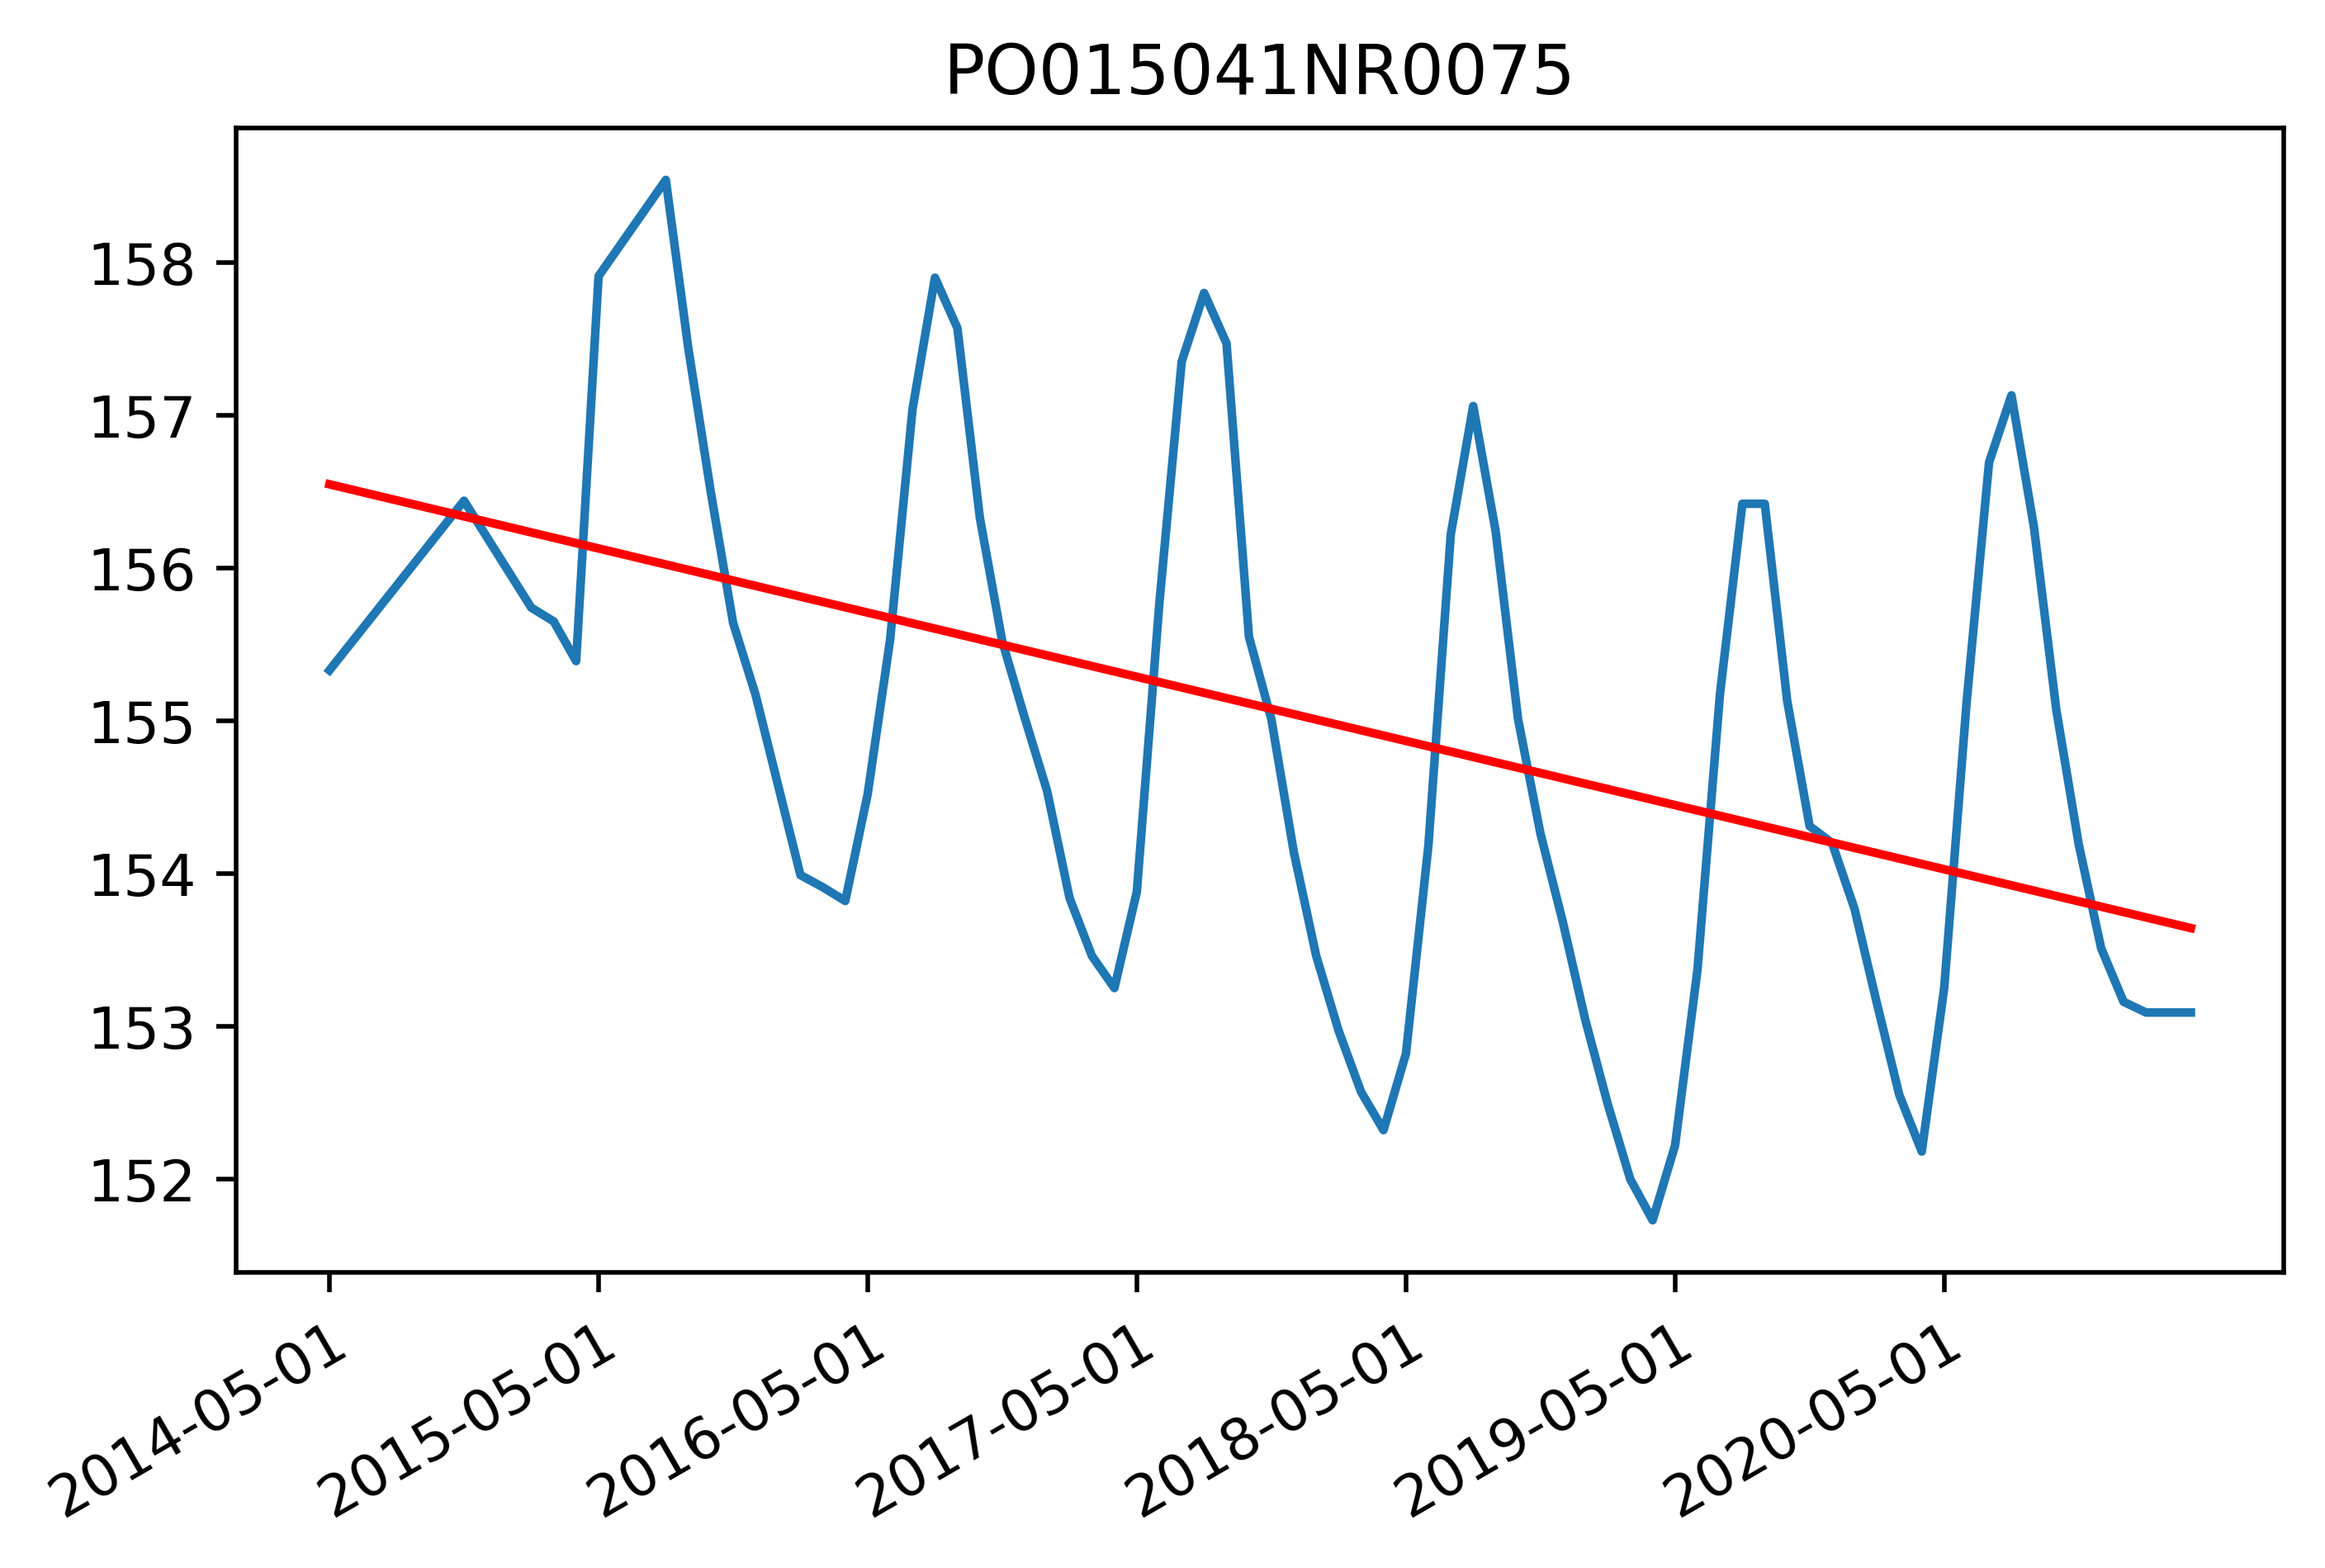

In [13]:
#Visualize the slope overlayed to the time series
#BUSTO GAROLFO
col = meta.loc[meta['COMUNE'] == 'BUSTO GAROLFO', 'CODICE'].values[0]
dv.plot_sen(head_fill, col, db_slope)

In [14]:
def cm2inch(*tupl):
    inch = 2.54
    if isinstance(tupl[0], tuple):
        return tuple(i/inch for i in tupl[0])
    else:
        return tuple(i/inch for i in tupl)

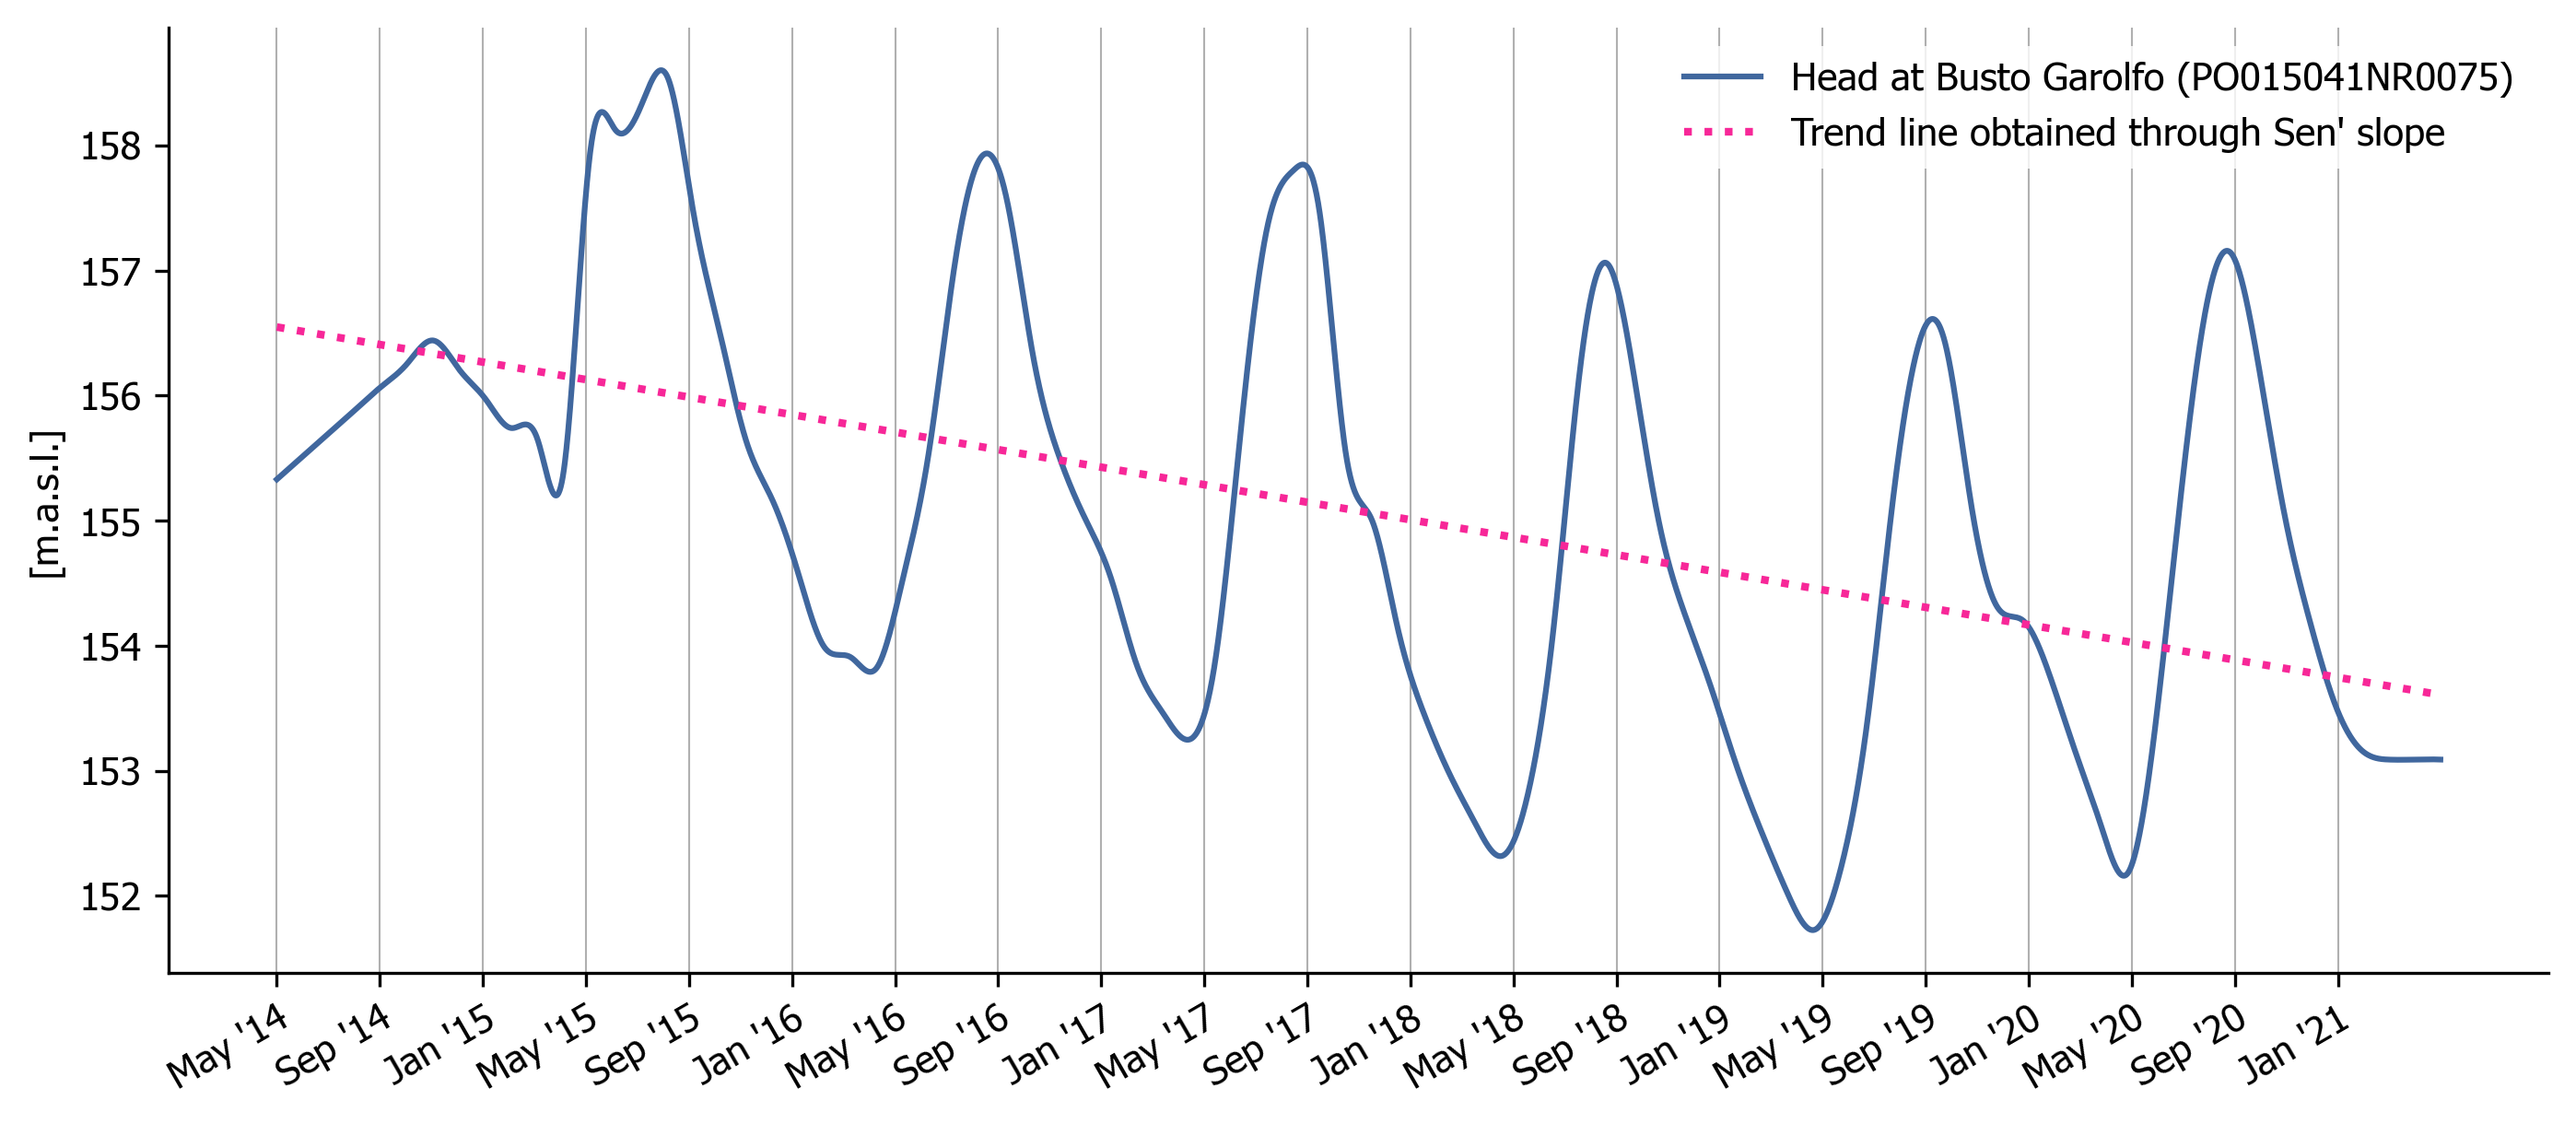

In [185]:
from scipy.interpolate import interp1d
x = np.linspace(0, len(head_fill[col].dropna().index), 84)
y = head_fill[col].dropna().values
ys = db_slope.loc[col, 'intercept'] + db_slope.loc[col, 'slope'] * np.array([i for i in range(len(head_fill[col].dropna().index))])
xnew = np.linspace(0, len(head_fill[col].dropna().index), 84*50)
f_cubic = interp1d(x, y, kind='cubic')
f_linear = interp1d(x, ys)

font = {'fontname': 'tahoma'}
monthdict = {1: 'Jan',
             5: 'May',
             9: 'Sep'}
colors = {"level": "#40679E", #"#1B3C73", #001B79
           "trend": "#F72798"}
xlabels = pd.to_datetime([head_fill[col].dropna().index[i] for i in np.arange(0, len(head_fill[col].dropna()), 4)])
xlabels = [f"{monthdict[label.month]} '{label.year-2000}" for label in xlabels]

fig, ax = plt.subplots(figsize = cm2inch(28.22, 11.2889), dpi = 300)

ax.plot(f_cubic(xnew), label = f"Head at Busto Garolfo ({col})", color = colors["level"], linewidth = 1.5)
ax.plot(db_slope.loc[col, 'intercept'] + db_slope.loc[col, 'slope'] * xnew, ':',
        label = "Trend line obtained through Sen' slope", color = colors["trend"], linewidth = 2)

leg = ax.legend(prop = {"family": "tahoma"})
leg.get_frame().set_linewidth(0.0)
ax.set_xticks(np.arange(0, len(xnew), 4*50), labels = xlabels)
ax.grid(axis = 'x', linewidth = 0.5)
ax.spines.top.set_visible(False)
ax.spines.right.set_visible(False)
# ax.spines.left.set_bounds(f_cubic(xnew).min(), f_cubic(xnew).max())

plt.ylabel('[m.a.s.l.]', **font)
plt.xticks(**font)
plt.yticks(**font)
plt.setp(ax.get_xticklabels(), rotation = 30, ha = "right", rotation_mode = "anchor")
plt.show()

In [156]:
len(xnew)

4200

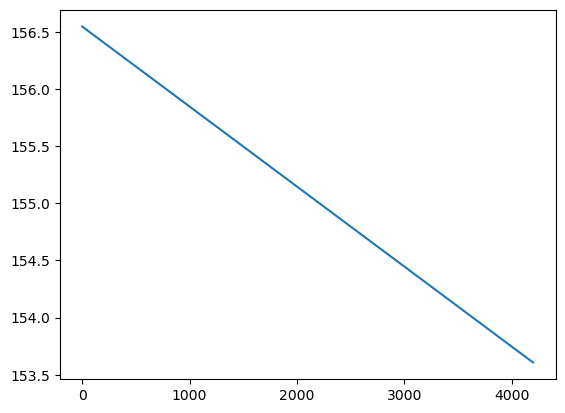

In [160]:
plt.plot(db_slope.loc[col, 'intercept'] + db_slope.loc[col, 'slope'] * xnew)

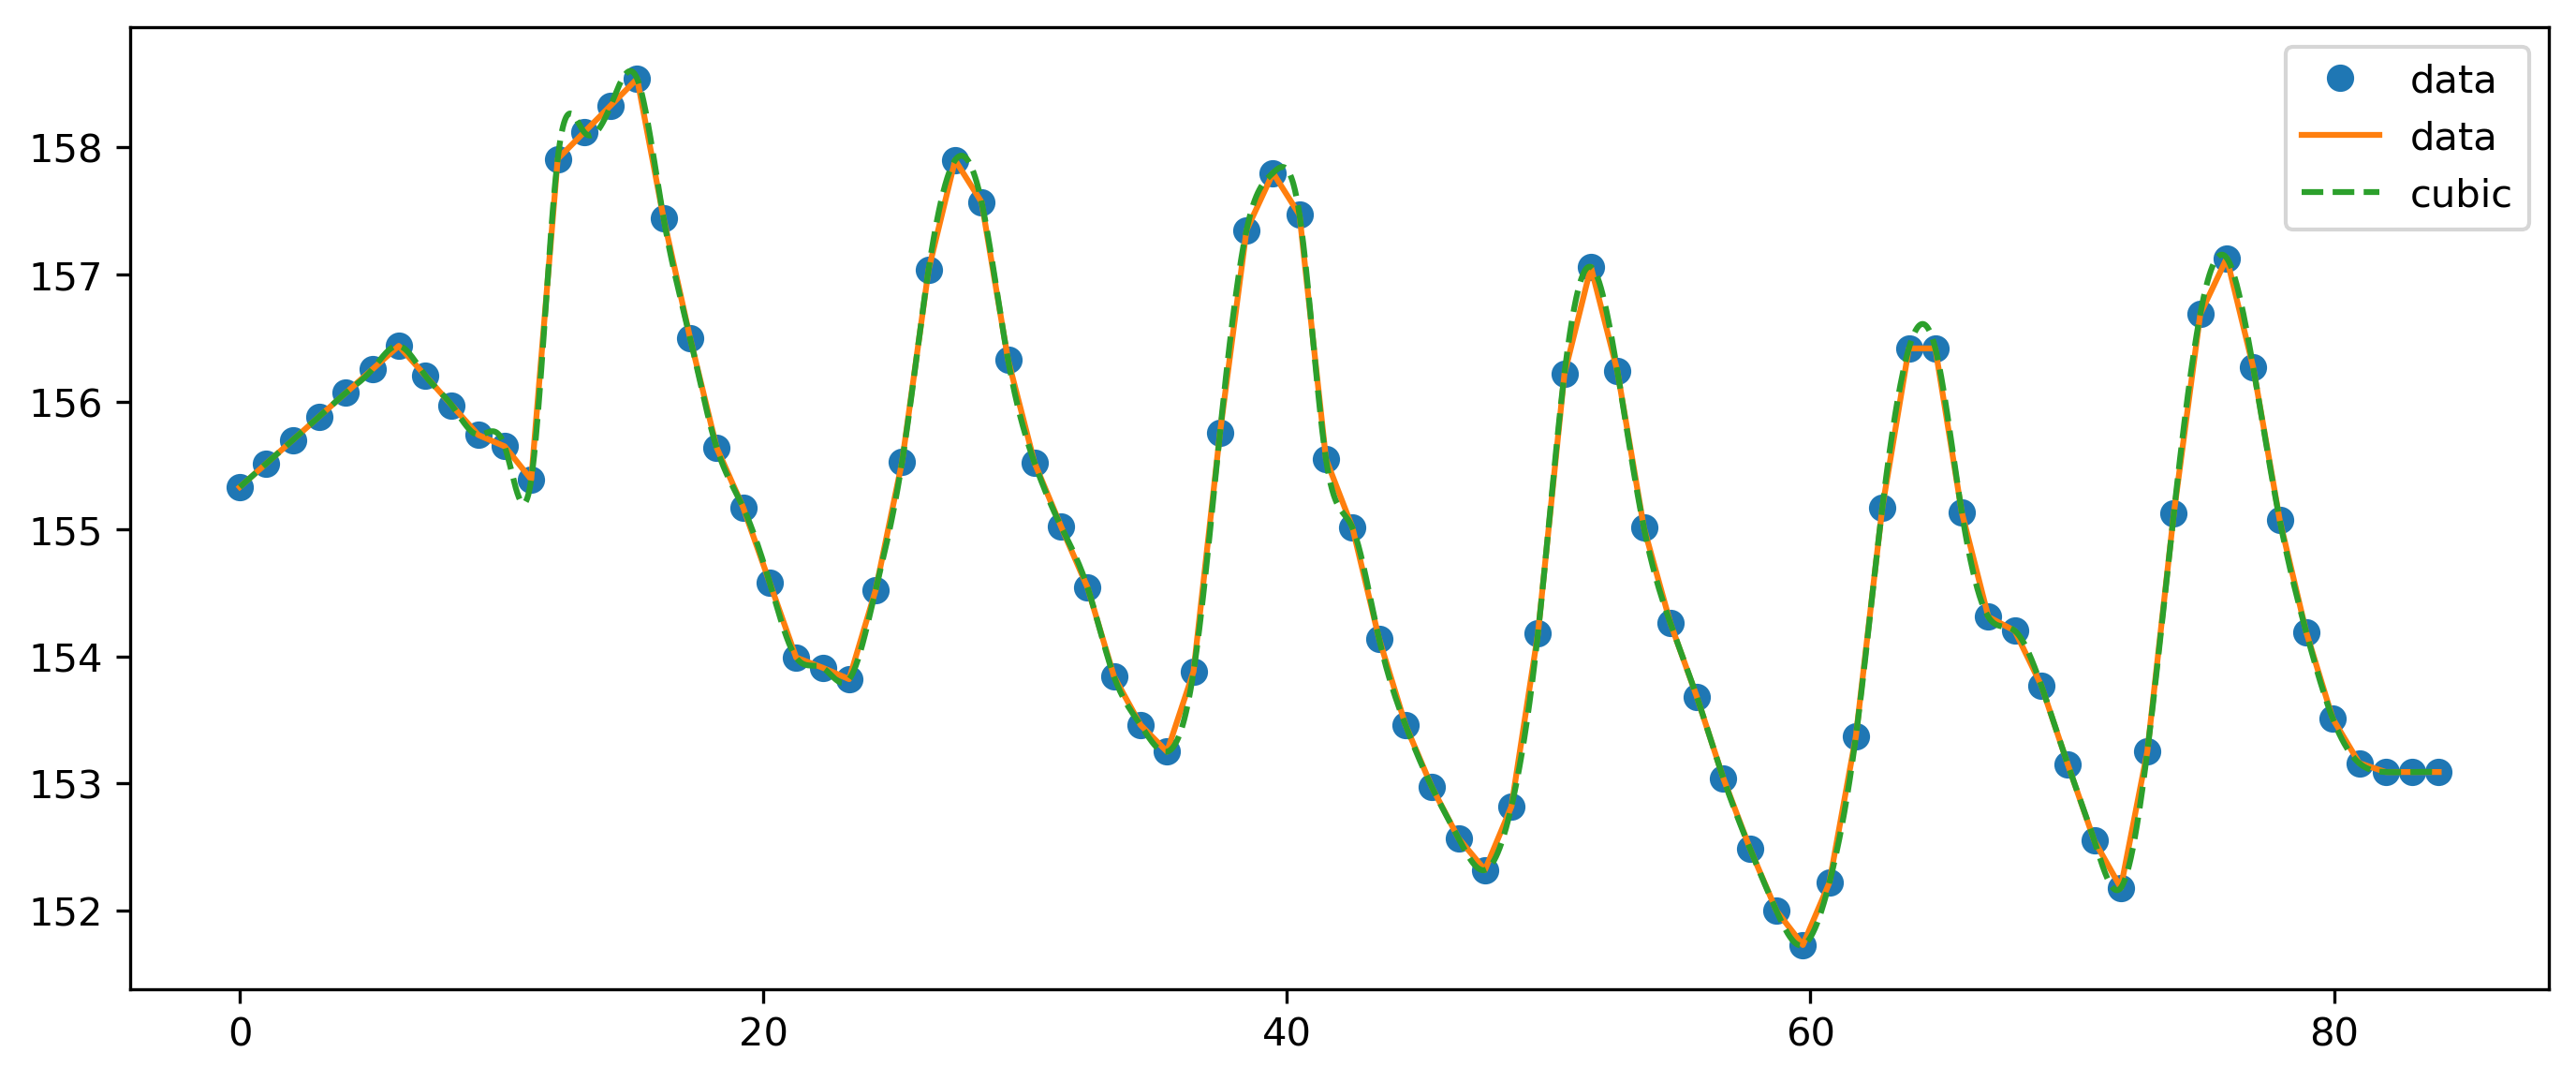

In [150]:
# Plot.
fig, ax = plt.subplots(figsize = cm2inch(28.22, 11.2889), dpi = 300)
ax.plot(x, y, 'o', label='data')
ax.plot(x, y, '-', label='data')
# plt.plot(xnew, f_linear(xnew), '-', label='linear')
ax.plot(xnew, f_cubic(xnew), '--', label='cubic')
ax.legend(loc='best')
plt.show()